## Preliminaries (imports)

In [14]:
from IPython.display import display, Markdown

import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

from ray.tune import Analysis

def printmd(text: str) -> None:
    display(Markdown(text))

In [15]:
import sys
sys.path.append('../src')

from config import config
from rendering import sampling

from experiment_analysis.experiment import Experiment
from experiment_analysis.parsing import load_experiments

config.set_data_dir("../data")

ray_dir = Path("../ray_results/")

# Tune trials analysis

In [16]:
trials = list(ray_dir.iterdir())
print("\n".join(str(t) for t in trials))

../ray_results/Trainable_2021-05-16_19-35-58
../ray_results/Trainable_2021-05-16_19-23-01
../ray_results/Trainable_2021-05-16_10-25-46
../ray_results/Trainable_2021-05-17_09-56-07
../ray_results/Trainable_2021-05-11_18-59-15
../ray_results/Trainable_2021-05-17_09-53-21
../ray_results/Trainable_2021-05-16_19-25-19
../ray_results/Trainable_2021-05-10_17-14-26
../ray_results/Trainable_2021-05-16_19-37-23
../ray_results/Trainable_2021-05-16_17-40-42
../ray_results/Trainable_2021-05-16_00-28-02
../ray_results/Trainable_2021-05-11_19-02-42
../ray_results/Trainable_2021-05-16_22-32-34
../ray_results/Trainable_2021-05-13_21-52-57
../ray_results/Trainable_2021-05-16_13-14-15
../ray_results/Trainable_2021-05-17_12-08-57
../ray_results/Trainable_2021-05-17_08-05-38


In [17]:
analysis = Analysis(ray_dir)

In [18]:
analysis_columns = ["accuracy", "mcc", "f1_score", "config/network", "config/lr_extraction", "config/lr_tuning", "config/objective_metric", "logdir"]
analysis_df = analysis.dataframe(metric="mcc", mode="max").loc[:, analysis_columns].sort_values("mcc", ascending=False)

printmd("### tune trials dataframe")
display(analysis_df)

### tune trials dataframe

,accuracy,mcc,f1_score,config/network,config/lr_extraction,config/lr_tuning,config/objective_metric,logdir
43,0.919311,0.759866,0.915472,Densenet,0.005123,0.0001,f1_score,../ray_results/Trainable_2021-05-17_08-05-38/T...
44,0.919311,0.759196,0.915363,Densenet,0.002003,0.0001,f1_score,../ray_results/Trainable_2021-05-17_08-05-38/T...
49,0.916591,0.751105,0.911081,Densenet,0.000772,0.0001,f1_score,../ray_results/Trainable_2021-05-17_08-05-38/T...
31,0.915684,0.750887,0.911795,Resnet,0.004588,0.0001,f1_score,../ray_results/Trainable_2021-05-17_12-08-57/T...
20,0.914778,0.750737,0.913944,Densenet,0.005432,0.0001,f1_score,../ray_results/Trainable_2021-05-16_22-32-34/T...
41,0.912058,0.747473,0.911454,Densenet,0.009144,0.0001,f1_score,../ray_results/Trainable_2021-05-17_08-05-38/T...
32,0.914778,0.746291,0.909517,Resnet,0.000933,0.0001,f1_score,../ray_results/Trainable_2021-05-17_12-08-57/T...
36,0.913871,0.744504,0.909860,Resnet,0.004229,0.0001,f1_score,../ray_results/Trainable_2021-05-17_12-08-57/T...
42,0.912965,0.742989,0.909710,Densenet,0.004529,0.0001,f1_score,../ray_results/Trainable_2021-05-17_08-05-38/T...
38,0.911151,0.741011,0.908087,Resnet,0.005480,0.0001,f1_score,../ray_results/Trainable_2021-05-17_12-08-57/T...


In [19]:
best_experiment_dir = Path(analysis.get_best_logdir(metric="mcc", mode="max"))

printmd("### best trial logdir")
display(str(best_experiment_dir))

### best trial logdir

'../ray_results/Trainable_2021-05-17_08-05-38/Trainable_443609ee_9_batch_size=32,data_dir=_content_data,epochs_extraction=2,epochs_tuning=10,alpha=0.25,function=focal_loss,gamm_2021-05-17_11-10-29'

In [20]:
printmd("### best trial config")
display(analysis.get_best_config(metric="mcc", mode="max"))

### best trial config

{'batch_size': 32,
 'data_dir': '/content/data',
 'epochs_extraction': 2,
 'epochs_tuning': 10,
 'loss': {'alpha': 0.25, 'function': 'focal_loss', 'gamma': 2.0},
 'lr_extraction': 0.005122599036163009,
 'lr_tuning': 0.0001,
 'model_params': '0',
 'network': 'Densenet',
 'objective_metric': 'f1_score',
 'seed': 0,
 'val_fraction': 0.2}

# Best trial anals

In [21]:
print(best_experiment_dir / "experiments")

../ray_results/Trainable_2021-05-17_08-05-38/Trainable_443609ee_9_batch_size=32,data_dir=_content_data,epochs_extraction=2,epochs_tuning=10,alpha=0.25,function=focal_loss,gamm_2021-05-17_11-10-29/experiments


In [22]:
best_experiment = Experiment(next((best_experiment_dir / "experiments").iterdir()))

In [31]:
printmd("### best experiment classification report")
print(best_experiment.classification_report("valid"))

### best experiment classification report

              precision    recall  f1-score   support

       akiec       0.75      0.40      0.52        30
         bcc       0.69      0.83      0.75        35
         bkl       0.82      0.72      0.76        88
          df       0.40      0.50      0.44         8
         mel       0.67      0.57      0.61        46
          nv       0.96      0.98      0.97       883
        vasc       1.00      1.00      1.00        13

    accuracy                           0.92      1103
   macro avg       0.75      0.71      0.72      1103
weighted avg       0.92      0.92      0.92      1103



### best experiment confusion matrix

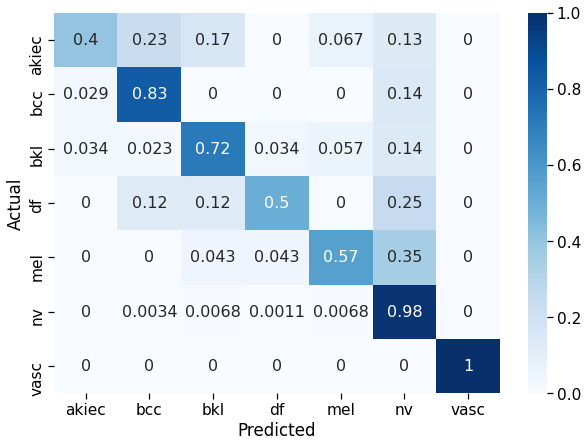

In [29]:
printmd("### best experiment confusion matrix")
best_experiment.plot_confusion_matrix("valid", normalize="true")

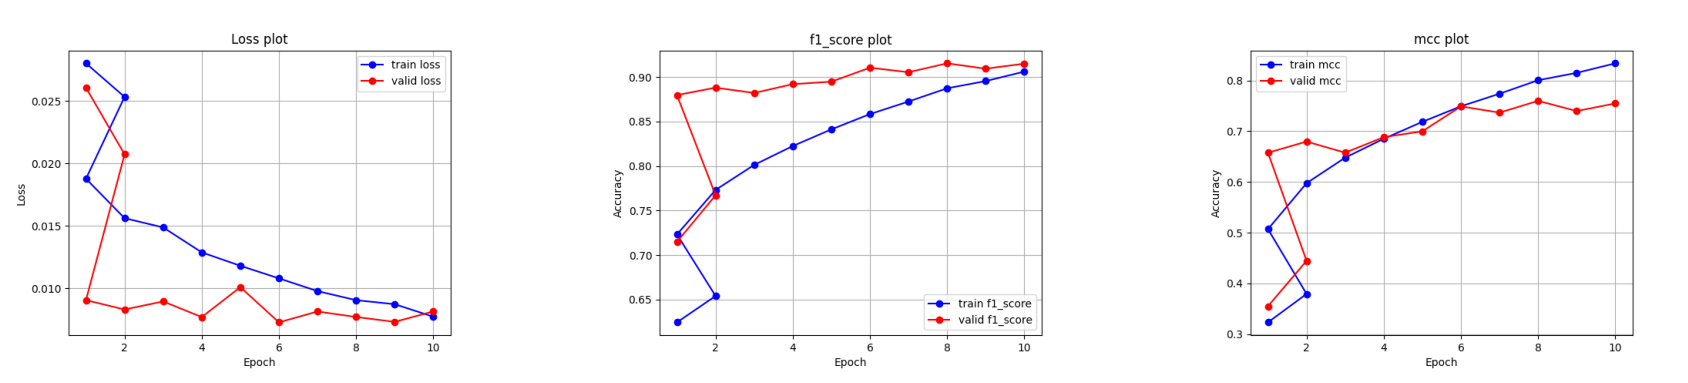

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 30))
plot_names = ["loss", "f1_score", "mcc"]
for ax, plot_name in zip(axes.flat, plot_names):
    best_experiment.display_plot(plot_name, ax=ax)
plt.show()